In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Kaggle'

In [ ]:
%cd /content/drive/My\ Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip creditcardfraud.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load dataset

dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# check null

dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dataset menunjukan jumlah data yang imbalance 

In [ ]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

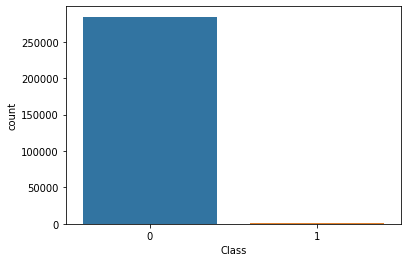

In [ ]:
sns.countplot(dataset.Class)
plt.show()

In [ ]:
fraud = dataset[dataset.Class == 1]
normal = dataset[dataset.Class == 0]

print(f'Shape of Fraud Transactions: {fraud.shape}')
print(f'Shape of Normal Transactions: {normal.shape}')

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (284315, 31)


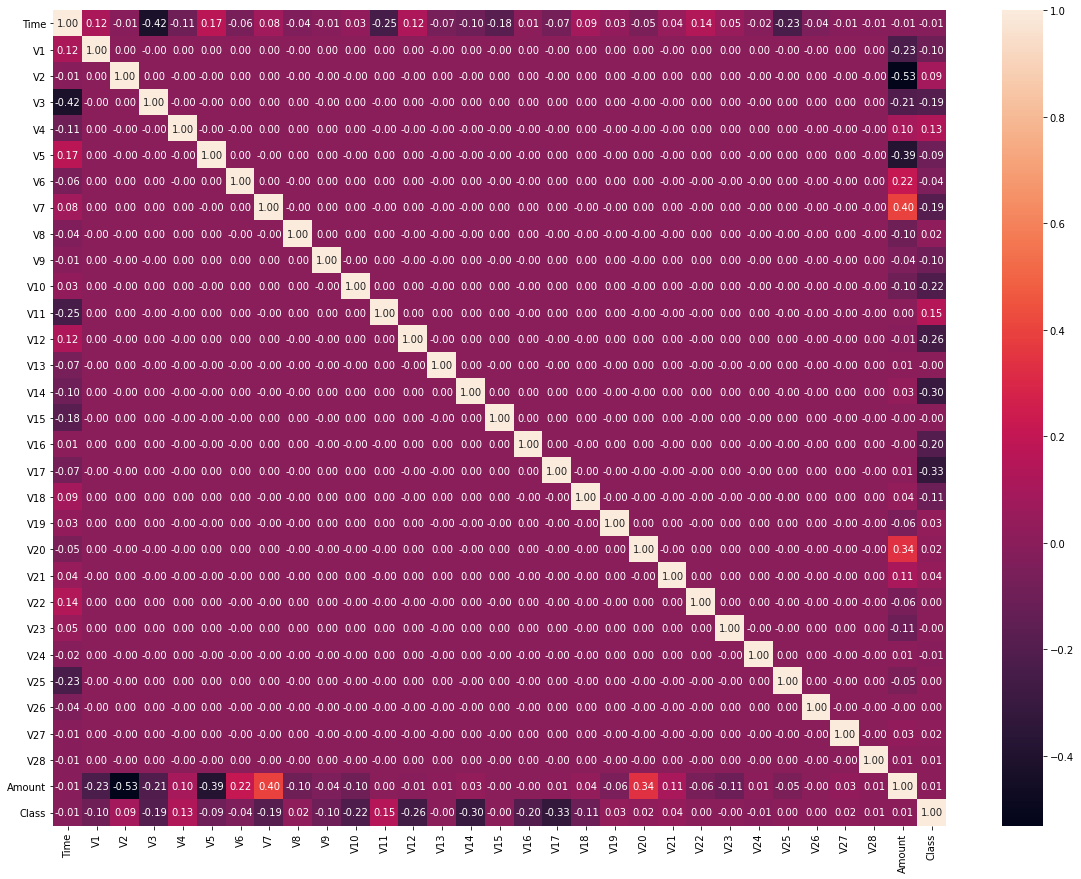

In [ ]:
corr = dataset.corr()

plt.figure(figsize=(20,15))
sns.heatmap(data=corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset.Class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
print(f'Shape of X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}, y_test: {y_test.shape}')

Shape of X_train: (227845, 30), y_train: (227845,)
Shape of X_test: (56962, 30), y_test: (56962,)


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameter = {
#     svm:{
#         "C":[10,100,1000,10000],
#         'kernel':['rbf', 'linear'],
#         'gamma':[10,100,1000]
#     },
#     dt:{
#         'criterion':['gini', 'entropy'],
#         'min_samples_split':[2,4,6],
#         'min_samples_leaf':[1,2,5],
#         'max_depth':["none", 1,2,4]
#     },
#     rf:{
#         'n_estimators':[10,100,1000,10000],
#         'criterion':['gini', 'entropy'],
#         'min_samples_split':[2,4,6],
#         'min_samples_leaf':[1,2,5],
#         'max_depth':["none", 1,2,4]
#     }
# }

# for i in [svm, dt, rf]:
#   grid_search = GridSearchCV(i, param_grid=parameter[i], cv=10, scoring='accuracy')
#   grid_search.fit(X_train, y_train)
#   grid_search.best_params_
#   print("{i} finished")

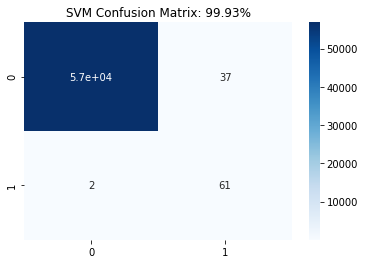

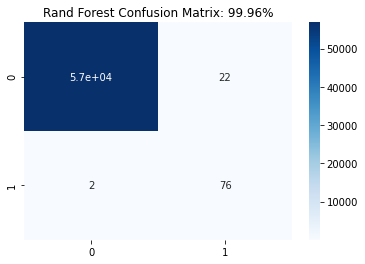

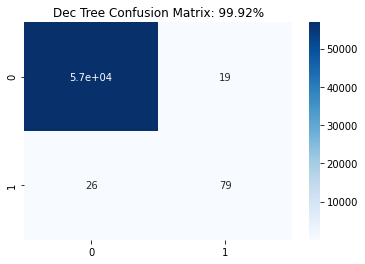

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nama_clasifier = ["SVM", "Rand Forest", "Dec Tree"]
models = [svm, rf, dt]
akurasi = []
index = 0

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    cm = confusion_matrix(y_pred, y_test)
    plt.title(f"{nama_clasifier[index]} Confusion Matrix: {round(acc*100,2)}%")
    sns.heatmap(cm, cmap="Blues", annot=True)
    plt.show()
    
    akurasi.append(acc)
    index += 1

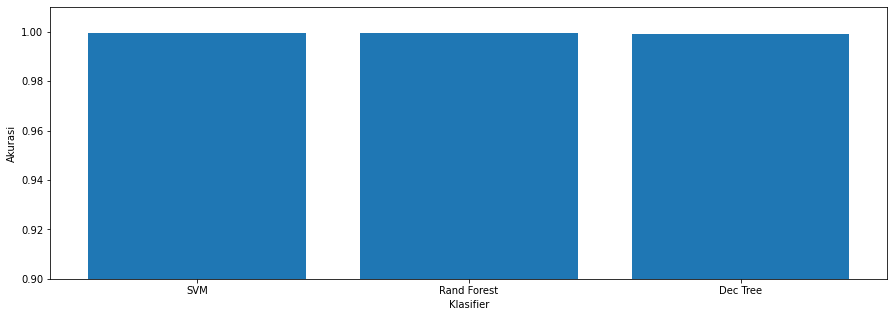

In [ ]:
plt.figure(figsize=(15,5)) # urutan (width, height)
plt.bar(nama_clasifier, akurasi)
plt.xlabel("Klasifier")
plt.ylabel("Akurasi")
plt.ylim(0.9, 1.01)
plt.show()